In [230]:
#!pip install geopandas

In [231]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset if needed below
# warnings.filterwarnings("default")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', '{:.2f}'.format)

from matplotlib.ticker import ScalarFormatter
import textwrap
import geopandas as gpd
import plotly.express as px

In [232]:
df = pd.read_csv('ppp_risk.csv')
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.96,0.96,0.35
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Land

In [233]:
# Calculate the threshold for the top 10% of risk scores
threshold = df['average_risk_score'].quantile(0.95)

threshold = f"{threshold:.3f}"

print("Threshold for the top 5% of risk scores:", threshold)

Threshold for the top 5% of risk scores: 0.442


In [234]:
def g(df):
    df['anomaly'] = (df['average_risk_score'].rank(ascending=False)<= len(df) * 0.03).astype(int)
    return df

df = g(df)
df.head() 

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score,anomaly
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0,0.00,769.36,0.00,0.00,0.00,0.00,0.00,773.55,0.00,769.36,769.36,0.94,0.83,0.00,999.00,0.00,0.00,0.00,0.00,0.00,999.00,0.00,999.00,999.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.96,0.96,0.35,0
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,

We will objectively define the top 3% of risk scores as anomalous given that the sci-kit learn Isolation Forest model yielded an anomaly rate of 3.6% and the H2O Isolation Forest model yielded an anomaly rate of 3%.

In [235]:
df['anomaly'].value_counts()

anomaly
0    936562
1     28990
Name: count, dtype: int64

In [236]:
anomalies = df[df["anomaly"]==1]
normal_loans = df[df["anomaly"]==0]

anomalies.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count,expected_UTILITIES_PROCEED,expected_PAYROLL_PROCEED,expected_MORTGAGE_INTEREST_PROCEED,expected_RENT_PROCEED,expected_REFINANCE_EIDL_PROCEED,expected_HEALTH_CARE_PROCEED,expected_DEBT_INTEREST_PROCEED,expected_ForgivenessAmount,expected_ApprovalDifference,expected_InitialApprovalAmount,expected_CurrentApprovalAmount,deviant_JR,deviant_JR_risk_score,deviant_UTILITIES_PROCEED,deviant_PAYROLL_PROCEED,deviant_MORTGAGE_INTEREST_PROCEED,deviant_RENT_PROCEED,deviant_REFINANCE_EIDL_PROCEED,deviant_HEALTH_CARE_PROCEED,deviant_DEBT_INTEREST_PROCEED,deviant_ForgivenessAmount,deviant_ApprovalDifference,deviant_InitialApprovalAmount,deviant_CurrentApprovalAmount,deviant_UTILITIES_PROCEED_risk_score,deviant_PAYROLL_PROCEED_risk_score,deviant_MORTGAGE_INTEREST_PROCEED_risk_score,deviant_RENT_PROCEED_risk_score,deviant_REFINANCE_EIDL_PROCEED_risk_score,deviant_HEALTH_CARE_PROCEED_risk_score,deviant_DEBT_INTEREST_PROCEED_risk_score,deviant_ForgivenessAmount_risk_score,deviant_ApprovalDifference_risk_score,deviant_InitialApprovalAmount_risk_score,deviant_CurrentApprovalAmount_risk_score,average_risk_score,anomaly
64,9573647007,2020-04-09,1084,PPP,"ANCHORAGE COMMUNITY MENTAL HEALTH SERVICES, INC.",4020 FOLKER STREET,ANCHORAGE,AK,99508,2021-07-08,PAID IN FULL,24,100,2266607.92,2266607.92,0.00,UNKNOWN/NOTSTATED,3386,FIRST NATIONAL BANK ALASKA,101 W 36TH AVE,ANCHORAGE,AK,99503,U,N,Y,EXISTING OR MORE THAN 2 YEARS OLD,ANCHORAGE,ANCHORAGE,AK,99508,AK-,168.00,621498.00,UNANSWERED,UNKNOWN/NOTSTATED,64000.00,2148877.92,3600.00,50130.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,3386,FIRST NATIONAL BANK ALASKA,ANCHORAGE,AK,UNANSWERED,UNANSWERED,Y,2292627.34,2021-06-11,1,1,1,1,0,0,0,All Other Outpatient Care Centers,77.02,1,-26019.42,0.00,0.00,13491.71,13491.71,380.95,12790.94,21.43,298.39,0.00,0.00,0.00,13646.59,0,0,831.00,27901.95,46.74,650.91,0.00,0.00,0.00,29768.46,0.00,29430.61,29430.61,1.18,0.93,76.02,76.02,76.02,76.02,0.00,0.00,0.00,76.02,0.00,76.02,76.02,0.91,0.73,0.99,0.97,0.00,0.00,0.00,0.74,0.00,0.73,0.73,0.53,1
104,8151367110,2020-04-15,1084,PPP,THE SUPERIOR GROUP INC,2220 E 88TH AVENUE,ANCHORAGE,AK,99507,2021-06-10,PAID IN FULL,24,100,1975142.29,1975142.29,0.00,UNKNOWN/NOTSTATED,3386,FIRST NATIONAL BANK ALASKA,101 W 36TH AVE,ANCHORAGE,AK,99503,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,ANCHORAGE,ANCHORAGE,AK,99507,AK-,85.00,551114.00,UNANSWERED,UNKNOWN/NOTSTATED,85639.00,1801680.22,0.00,35380.40,0.00,52442.67,0.00,CORPORAT

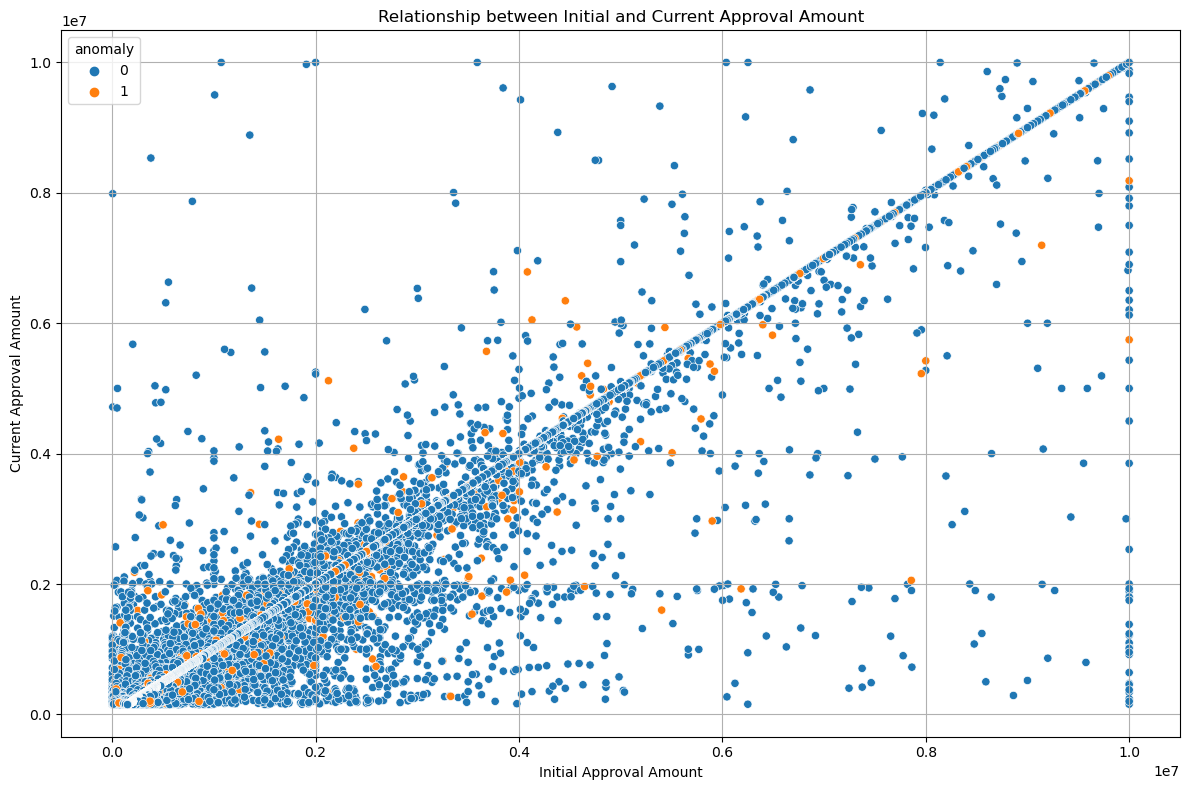

In [237]:
# Relationship between Initial and Current Approval Amount
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['InitialApprovalAmount'], y=df['CurrentApprovalAmount'], hue = df['anomaly'], alpha=1, legend='auto')

plt.title('Relationship between Initial and Current Approval Amount')
plt.xlabel('Initial Approval Amount')
plt.ylabel('Current Approval Amount')
plt.grid(True)
plt.tight_layout()

# Avoid scientific notation on the x and y axes
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.show()


We can see here that anomalous loans follow a weaker positive correlation between current and intial approval amount based on how anomalous loans are distributed away from the best fit line for normal loans.

In [238]:
# Outlier analysis
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data < lower_bound) | (data > upper_bound)]

anomalies_initial_outliers = detect_outliers(anomalies['InitialApprovalAmount'])
anomalies_current_outliers = detect_outliers(anomalies['CurrentApprovalAmount'])

normal_loans_initial_outliers = detect_outliers(normal_loans['InitialApprovalAmount'])
normal_loans_current_outliers = detect_outliers(normal_loans['CurrentApprovalAmount'])

print(f"Number of outliers in Anomalous Loans - Initial Approval Amount: {len(anomalies_initial_outliers)}, {round(len(anomalies_initial_outliers) / len(anomalies), 3)*100}%")
print(f"Number of outliers in Anomalous Loans - Current Approval Amount: {len(anomalies_current_outliers)}, {round(len(anomalies_current_outliers) / len(anomalies), 3)*100}%")

print(f"Number of outliers in Normal Loans - Initial Approval Amount: {len(normal_loans_initial_outliers)}, {round(len(normal_loans_initial_outliers) / len(normal_loans), 3)*100}%")
print(f"Number of outliers in Normal Loans - Current Approval Amount: {len(normal_loans_current_outliers)}, {round(len(normal_loans_current_outliers) / len(normal_loans), 4)*100}%")


Number of outliers in Anomalous Loans - Initial Approval Amount: 2877, 9.9%
Number of outliers in Anomalous Loans - Current Approval Amount: 2865, 9.9%
Number of outliers in Normal Loans - Initial Approval Amount: 98549, 10.5%
Number of outliers in Normal Loans - Current Approval Amount: 98366, 10.5%


The anomalous loans themselves are outliers from the original dataset but we also see a higher prevalance of outliers amongst these anomalous loans in intial and current approval amounts compared to normal loans.

In [239]:
# Industry analysis
anomalous_naics_counts = pd.DataFrame(anomalies['NAICS Industry Description'].value_counts())
anomalous_naics_counts['anomaly % total'] = (anomalous_naics_counts['count']/(anomalous_naics_counts['count'].sum()))*100
anomalous_naics_counts.head(10)

,count,anomaly % total
NAICS Industry Description,,
New Car Dealers,2780,9.59
UNKNOWN/NOTSTATED,1434,4.95
Limited-Service Restaurants,733,2.53
Full-Service Restaurants,629,2.17
Machine Shops,550,1.90
Commercial Printing (except Screen and Books),518,1.79
Home Health Care Services,458,1.58
Hotels (except Casino Hotels) and Motels,409,1.41
All Other Miscellaneous Manufacturing,307,1.06


In [240]:
# Industry analysis
normal_loans_naics_counts = pd.DataFrame(normal_loans['NAICS Industry Description'].value_counts())
normal_loans_naics_counts['normal % total'] = (normal_loans_naics_counts['count']/(normal_loans_naics_counts['count'].sum()))*100
normal_loans_naics_counts.head(10)

,count,normal % total
NAICS Industry Description,,
Full-Service Restaurants,75922,8.11
UNKNOWN/NOTSTATED,74624,7.97
Offices of Physicians (except Mental Health Specialists),28236,3.01
Offices of Lawyers,19992,2.13
Hotels (except Casino Hotels) and Motels,18791,2.01
"Plumbing, Heating, and Air‑Conditioning Contractors",18360,1.96
Offices of Dentists,17612,1.88
Commercial and Institutional Building Construction,17337,1.85
Electrical Contractors and Other Wiring Installation Contractors,15084,1.61


In [241]:
naics = pd.merge(normal_loans_naics_counts,anomalous_naics_counts, on = 'NAICS Industry Description')
naics.head(10)

,count_x,normal % total,count_y,anomaly % total
NAICS Industry Description,,,,
Full-Service Restaurants,75922,8.11,629,2.17
UNKNOWN/NOTSTATED,74624,7.97,1434,4.95
Offices of Physicians (except Mental Health Specialists),28236,3.01,73,0.25
Offices of Lawyers,19992,2.13,1,0.00
Hotels (except Casino Hotels) and Motels,18791,2.01,409,1.41
"Plumbing, Heating, and Air‑Conditioning Contractors",18360,1.96,4,0.01
Offices of Dentists,17612,1.88,6,0.02
Commercial and Institutional Building Construction,17337,1.85,36,0.12
Electrical Contractors and Other Wiring Installation Contractors,15084,1.61,37,0.13


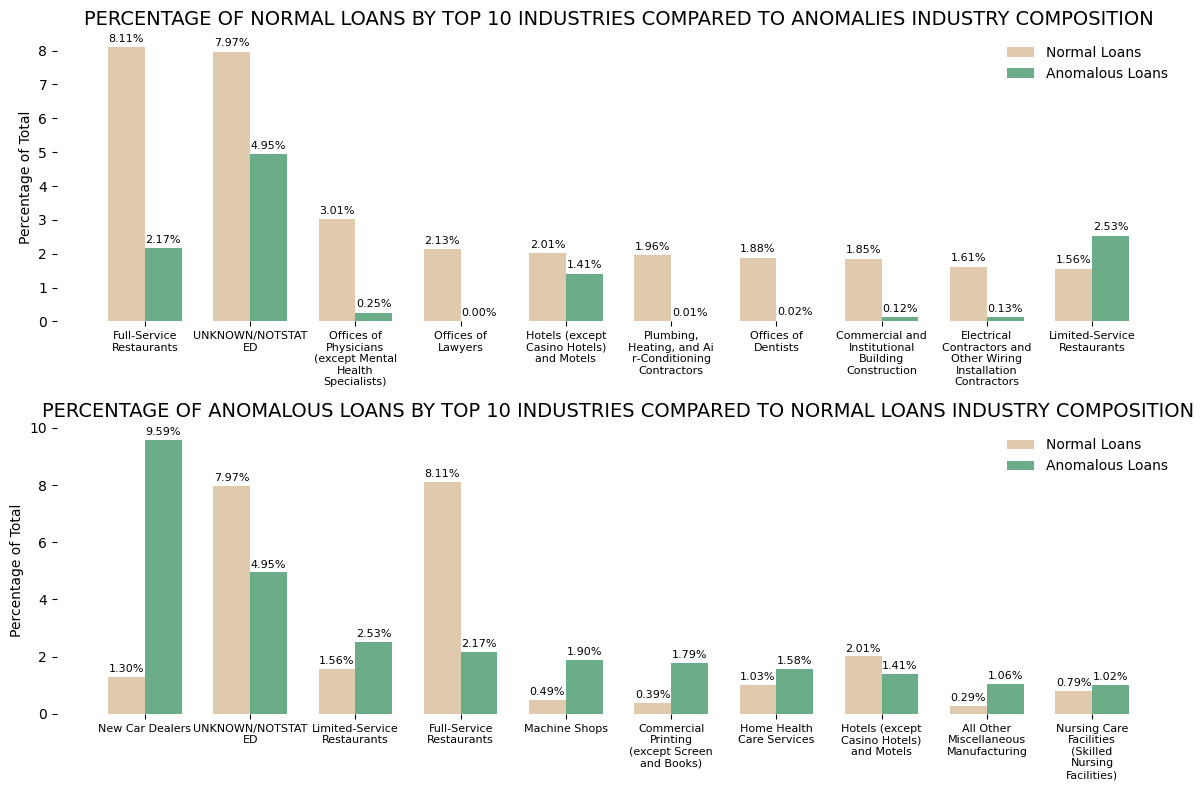

In [242]:
# Set custom colors for the bars
normal_color = 'tan'
anomaly_color = 'seagreen'

# Set the size of the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))  # Two subplots

# Bar width
bar_width = 0.35

# Plotting the first subplot (top 10 normal % total)
top_10_normal = naics.sort_values(by='normal % total', ascending=False).head(10)

# Positions for the bars on X-axis
ind1 = range(len(top_10_normal))

# Plot normal % total bars with custom color
normal_bars1 = ax1.bar(ind1, top_10_normal['normal % total'], bar_width, label='Normal Loans', color=normal_color, alpha=0.7)

# Plot anomaly % total bars with custom color
anomaly_bars1 = ax1.bar([i + bar_width for i in ind1], top_10_normal['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color, alpha=0.7)

# Use textwrap to break labels into multiple lines if needed
wrapped_labels1 = [textwrap.fill(label, width=15) for label in top_10_normal.index]

# X-axis ticks and labels for the first subplot
ax1.set_xticks([i + bar_width/2 for i in ind1])
ax1.set_xticklabels(wrapped_labels1, rotation=0, ha='center', fontsize=8)  # Adjust fontsize as needed

# Add values on top of each bar for the first subplot
for i, value in enumerate(top_10_normal['normal % total']):
    ax1.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

for i, value in enumerate(top_10_normal['anomaly % total']):
    ax1.text(i + bar_width, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

# Add legend to the first subplot
ax1.legend(frameon=False)

# Remove graph border for the first subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Reduce font size of title and axis labels for the first subplot
ax1.set_ylabel('Percentage of Total', fontsize=10)
ax1.set_title('PERCENTAGE OF NORMAL LOANS BY TOP 10 INDUSTRIES COMPARED TO ANOMALIES INDUSTRY COMPOSITION', fontsize=14)
# Plotting the second subplot (top 10 anomaly % total)
top_10_anomaly = naics.sort_values(by='anomaly % total', ascending=False).head(10)

# Positions for the bars on X-axis
ind2 = range(len(top_10_anomaly))

# Plot normal % total bars with custom color for the second subplot
normal_bars2 = ax2.bar(ind2, top_10_anomaly['normal % total'], bar_width, label='Normal Loans', color=normal_color, alpha=0.7)

# Plot anomaly % total bars with custom color for the second subplot
anomaly_bars2 = ax2.bar([i + bar_width for i in ind2], top_10_anomaly['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color, alpha=0.7)

# Use textwrap to break labels into multiple lines if needed for the second subplot
wrapped_labels2 = [textwrap.fill(label, width=15) for label in top_10_anomaly.index]

# X-axis ticks and labels for the second subplot
ax2.set_xticks([i + bar_width/2 for i in ind2])
ax2.set_xticklabels(wrapped_labels2, rotation=0, ha='center', fontsize=8)  # Adjust fontsize as needed

# Add values on top of each bar for the second subplot
for i, value in enumerate(top_10_anomaly['normal % total']):
    ax2.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

for i, value in enumerate(top_10_anomaly['anomaly % total']):
    ax2.text(i + bar_width, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

# Add legend to the second subplot
ax2.legend(frameon=False)

# Remove graph border for the second subplot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Reduce font size of title and axis labels for the second subplot
ax2.set_ylabel('Percentage of Total', fontsize=10)
ax2.set_title('PERCENTAGE OF ANOMALOUS LOANS BY TOP 10 INDUSTRIES COMPARED TO NORMAL LOANS INDUSTRY COMPOSITION', fontsize=14)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Normal loans composed of loans mostly from full-service restaurants (8.1%), physician offices (3%), law offices (2%), and hotels (2%).

In comparison, Almost 10% of anomalous loans were from new car dealers, an industry which didn't appear in the top ten industries for normal loans.

In [244]:
# Processing Method Analysis

anomalous_pm_counts = pd.DataFrame(anomalies['ProcessingMethod'].value_counts())
anomalous_pm_counts['anomaly % total'] = (anomalous_pm_counts['count']/(anomalous_pm_counts['count'].sum()))*100

normal_pm_counts = pd.DataFrame(normal_loans['ProcessingMethod'].value_counts())
normal_pm_counts['normal % total'] = (normal_pm_counts['count']/(normal_pm_counts['count'].sum()))*100

pm_counts = pd.merge(normal_pm_counts,anomalous_pm_counts, on = 'ProcessingMethod')
pm_counts.reset_index(inplace =True)
pm_counts.head(10)


,ProcessingMethod,count_x,normal % total,count_y,anomaly % total
0,PPP,645969,68.97,28583,98.60
1,PPS,290593,31.03,407,1.40


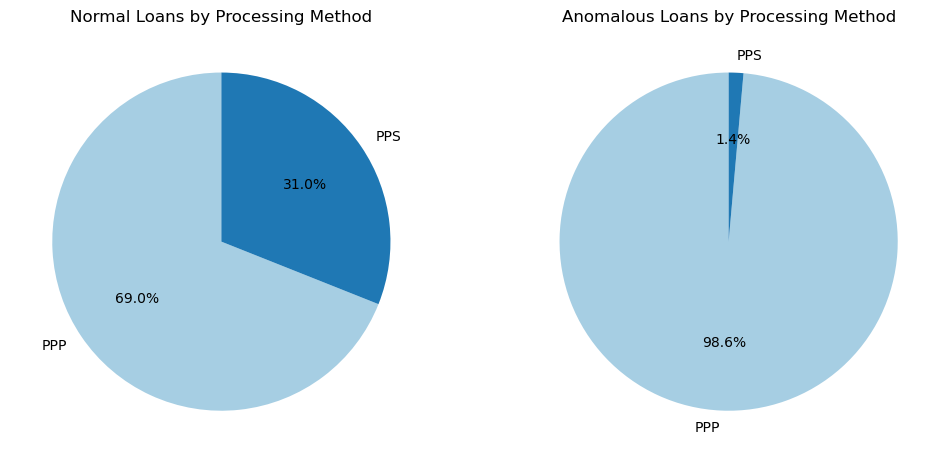

In [245]:
# Data for pie charts
normal_percentages = pm_counts['normal % total']
anomaly_percentages = pm_counts['anomaly % total']

# Set custom colors for the pie charts using the 'viridis' colormap
normal_colors = plt.cm.magma(range(len(normal_percentages)))
anomaly_colors = plt.cm.magma(range(len(anomaly_percentages)))

# Labels for the pie charts
labels = pm_counts['ProcessingMethod']

# Set custom colors for the pie charts
normal_colors = plt.cm.Paired(range(len(normal_percentages)))
anomaly_colors = plt.cm.Paired(range(len(anomaly_percentages)))

# Set the size of the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first pie chart (normal % total)
ax1.pie(normal_percentages, labels=labels, autopct='%1.1f%%', colors=normal_colors, startangle=90)
ax1.set_title('Normal Loans by Processing Method')

# Plotting the second pie chart (anomaly % total)
ax2.pie(anomaly_percentages, labels=labels, autopct='%1.1f%%', colors=anomaly_colors, startangle=90)
ax2.set_title('Anomalous Loans by Processing Method')

# Show the pie charts
plt.show()


We can see that anomalous loans are much more likely to be first draw PPP loans rather than second draw PPS loans in comparison to normal loans.

In [246]:
# State  analysis
anomalous_state_counts = pd.DataFrame(anomalies['BorrowerState'].value_counts())
anomalous_state_counts['anomaly % total'] = (anomalous_state_counts['count']/(anomalous_state_counts['count'].sum()))*100

# State analysis
normal_loan_state_counts = pd.DataFrame(normal_loans['BorrowerState'].value_counts())
normal_loan_state_counts['normal % total'] = (normal_loan_state_counts['count']/(normal_loan_state_counts['count'].sum()))*100

states = pd.merge(normal_loan_state_counts,anomalous_state_counts, on = 'BorrowerState')
states.sort_values(by ='normal % total', ascending = False).head(10)

,count_x,normal % total,count_y,anomaly % total
BorrowerState,,,,
CA,125723,13.42,3362,11.60
TX,73701,7.87,2360,8.14
NY,70461,7.52,3358,11.58
FL,58975,6.30,1027,3.54
IL,38803,4.14,1960,6.76
PA,37506,4.00,994,3.43
NJ,31737,3.39,778,2.68
OH,31554,3.37,1085,3.74
MI,28516,3.04,1275,4.40


In [247]:
states.sort_values(by ='anomaly % total', ascending = False).head(10)

,count_x,normal % total,count_y,anomaly % total
BorrowerState,,,,
CA,125723,13.42,3362,11.60
NY,70461,7.52,3358,11.58
TX,73701,7.87,2360,8.14
IL,38803,4.14,1960,6.76
MI,28516,3.04,1275,4.40
OH,31554,3.37,1085,3.74
FL,58975,6.30,1027,3.54
PA,37506,4.00,994,3.43
WI,16449,1.76,897,3.09


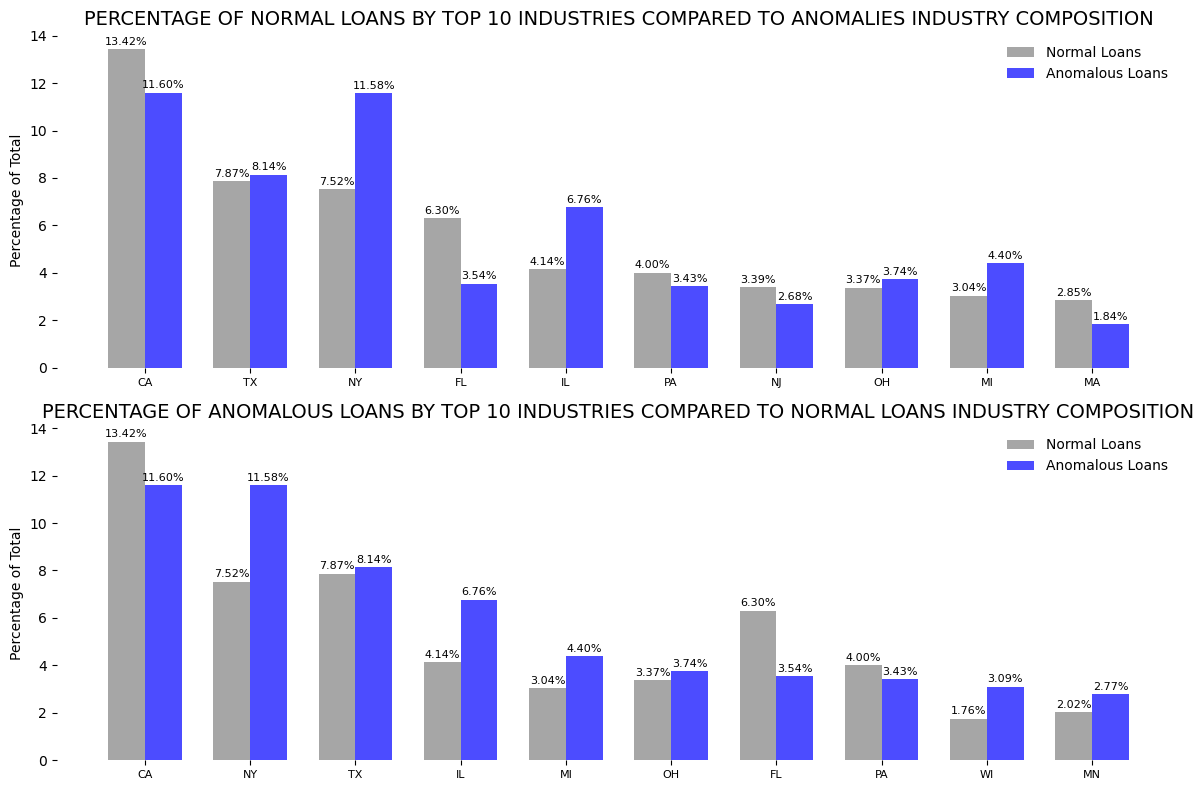

In [248]:
import matplotlib.pyplot as plt

# Assuming states is your DataFrame

# Set custom colors for the bars with transparency
normal_color = 'Gray'
anomaly_color = 'Blue'

# Set the size of the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))  # Two subplots

# Bar width
bar_width = 0.35

# Plotting the first subplot (top 10 normal % total)
top_10_normal = states.sort_values(by='normal % total', ascending=False).head(10)

# Positions for the bars on X-axis
ind1 = range(len(top_10_normal))

# Plot normal % total bars with custom color and transparency
normal_bars1 = ax1.bar(ind1, top_10_normal['normal % total'], bar_width, label='Normal Loans', color=normal_color, alpha=0.7)

# Plot anomaly % total bars with custom color and transparency
anomaly_bars1 = ax1.bar([i + bar_width for i in ind1], top_10_normal['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color, alpha=0.7)

# Use textwrap to break labels into multiple lines if needed
wrapped_labels1 = [textwrap.fill(label, width=15) for label in top_10_normal.index]

# X-axis ticks and labels for the first subplot
ax1.set_xticks([i + bar_width/2 for i in ind1])
ax1.set_xticklabels(wrapped_labels1, rotation=0, ha='center', fontsize=8)  # Adjust fontsize as needed

# Add values on top of each bar for the first subplot
for i, value in enumerate(top_10_normal['normal % total']):
    ax1.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

for i, value in enumerate(top_10_normal['anomaly % total']):
    ax1.text(i + bar_width, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

# Add legend to the first subplot
ax1.legend(frameon=False)

# Remove graph border for the first subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Reduce font size of title and axis labels for the first subplot
ax1.set_ylabel('Percentage of Total', fontsize=10)
ax1.set_title('PERCENTAGE OF NORMAL LOANS BY TOP 10 INDUSTRIES COMPARED TO ANOMALIES INDUSTRY COMPOSITION', fontsize=14)

# Plotting the second subplot (top 10 anomaly % total)
top_10_anomaly = states.sort_values(by='anomaly % total', ascending=False).head(10)

# Positions for the bars on X-axis
ind2 = range(len(top_10_anomaly))

# Plot normal % total bars with custom color for the second subplot
normal_bars2 = ax2.bar(ind2, top_10_anomaly['normal % total'], bar_width, label='Normal Loans', color=normal_color, alpha=0.7)

# Plot anomaly % total bars with custom color for the second subplot
anomaly_bars2 = ax2.bar([i + bar_width for i in ind2], top_10_anomaly['anomaly % total'], bar_width, label='Anomalous Loans', color=anomaly_color, alpha=0.7)

# Use textwrap to break labels into multiple lines if needed for the second subplot
wrapped_labels2 = [textwrap.fill(label, width=15) for label in top_10_anomaly.index]

# X-axis ticks and labels for the second subplot
ax2.set_xticks([i + bar_width/2 for i in ind2])
ax2.set_xticklabels(wrapped_labels2, rotation=0, ha='center', fontsize=8)  # Adjust fontsize as needed

# Add values on top of each bar for the second subplot
for i, value in enumerate(top_10_anomaly['normal % total']):
    ax2.text(i, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

for i, value in enumerate(top_10_anomaly['anomaly % total']):
    ax2.text(i + bar_width, value + 0.1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8, color='black')  # Adjust the position and fontsize as needed

# Add legend to the second subplot
ax2.legend(frameon=False)

# Remove graph border for the second subplot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Reduce font size of title and axis labels for the second subplot
ax2.set_ylabel('Percentage of Total', fontsize=10)
ax2.set_title('PERCENTAGE OF ANOMALOUS LOANS BY TOP 10 INDUSTRIES COMPARED TO NORMAL LOANS INDUSTRY COMPOSITION', fontsize=14)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [249]:
states.head()

,count_x,normal % total,count_y,anomaly % total
BorrowerState,,,,
CA,125723,13.42,3362,11.60
TX,73701,7.87,2360,8.14
NY,70461,7.52,3358,11.58
FL,58975,6.30,1027,3.54
IL,38803,4.14,1960,6.76


In [250]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, CA to MP
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   count_x          55 non-null     int64  
 1   normal % total   55 non-null     float64
 2   count_y          55 non-null     int64  
 3   anomaly % total  55 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.1+ KB


In [328]:
# Load state population data
population_data = pd.read_excel('NST-EST2022-POP.xlsx')
state_names = pd.read_csv('us-states-territories.csv', encoding = 'latin1')

# population_date cleaning

    # Reset header
header = population_data.iloc[0]
population_data = population_data.iloc[1:]
population_data.columns = header

    # Rename columns
population_data.columns = ['state_name', '2020', '2021', '2022']
population_data = population_data[['state_name', '2021']]

    # Clean state names
population_data['state_name'] = population_data['state_name'].str.replace('.','')
population_data['state_name'] = population_data['state_name'].str.replace(' ','')

population_data.head()


# state name data cleaning
state_names = state_names[['Name', 'Abbreviation']]
state_names['Name'] = state_names['Name'].str.replace('[E]','')
state_names['Name'] = state_names['Name'].str.replace('[F]','')
state_names.rename(columns ={'Name': 'state_name'}, inplace = True)
state_names['state_name'] = state_names['state_name'].str.replace(' ','')


# convert to string
state_names['state_name'] = state_names['state_name'].astype(str)
population_data['state_name'] = population_data['state_name'].astype(str)

# convert back to object
state_names['state_name'] = state_names['state_name'].astype(object)
population_data['state_name'] = population_data['state_name'].astype(object)

x = pd.merge(state_names, population_data, on='state_name')
x = x.drop(['state_name'], axis = 1)
x['Abbreviation'] = x['Abbreviation'].str.replace(' ','')

x.rename(columns = {'Abbreviation':'BorrowerState'}, inplace = True)

x.reset_index(inplace = False)

x.head()

,BorrowerState,2021
0,AL,5049846.00
1,AK,734182.00
2,AZ,7264877.00
3,AR,3028122.00
4,CA,39142991.00


In [329]:
merged_data = pd.merge(states, x, how='left', on = 'BorrowerState')
merged_data

,BorrowerState,count_x,normal % total,count_y,anomaly % total,2021
0,CA,125723,13.42,3362,11.60,39142991.00
1,TX,73701,7.87,2360,8.14,29558864.00
2,NY,70461,7.52,3358,11.58,19857492.00
3,FL,58975,6.30,1027,3.54,21828069.00
4,IL,38803,4.14,1960,6.76,12686469.00
5,PA,37506,4.00,994,3.43,13012059.00
6,NJ,31737,3.39,778,2.68,9267961.00
7,OH,31554,3.37,1085,3.74,11764342.00
8,MI,28516,3.04,1275,4.40,10037504.00
9,MA,26646,2.85,533,1.84,6989690.00


In [330]:
merged_data = merged_data[:52]
merged_data.rename(columns = {'count_x':'Count of Normal Loans', 'count_y':'Count of Anomalous Loans'}, inplace = True)

# Create new columns for normalized counts per 100,000 people
merged_data['normal_per_100k'] = (merged_data['Count of Normal Loans'] / merged_data['2021']) * 100000
merged_data['anomaly_per_100k'] = (merged_data['Count of Anomalous Loans'] / merged_data['2021']) * 100000

# Create rank columns for normal and anomalous loans per 100,000 people
merged_data['normal_rank'] = merged_data['normal_per_100k'].rank(ascending=False).astype(int)
merged_data['anomalous_rank'] = merged_data['anomaly_per_100k'].rank(ascending=False).astype(int)

# The lower the rank_score, the more anomalous the state
merged_data['rank_score'] = merged_data['normal_rank']/merged_data['anomalous_rank']

# Find percentage of anomalous loans as percent of total loans in in state
merged_data['% anom loans of total state loans'] = merged_data['Count of Anomalous Loans']/(merged_data['Count of Anomalous Loans']+merged_data['Count of Normal Loans'])*100
merged_data['% normal loans of total state loans'] = merged_data['Count of Normal Loans']/(merged_data['Count of Anomalous Loans']+merged_data['Count of Normal Loans'])*100

merged_data.head(10)

,BorrowerState,Count of Normal Loans,normal % total,Count of Anomalous Loans,anomaly % total,2021,normal_per_100k,anomaly_per_100k,normal_rank,anomalous_rank,rank_score,% anom loans of total state loans,% normal loans of total state loans
0,CA,125723,13.42,3362,11.60,39142991.00,321.19,8.59,15,20,0.75,2.60,97.40
1,TX,73701,7.87,2360,8.14,29558864.00,249.34,7.98,36,26,1.38,3.10,96.90
2,NY,70461,7.52,3358,11.58,19857492.00,354.83,16.91,5,1,5.00,4.55,95.45
3,FL,58975,6.30,1027,3.54,21828069.00,270.18,4.70,30,40,0.75,1.71,98.29
4,IL,38803,4.14,1960,6.76,12686469.00,305.86,15.45,17,3,5.67,4.81,95.19
5,PA,37506,4.00,994,3.43,13012059.00,288.24,7.64,22,28,0.79,2.58,97.42
6,NJ,31737,3.39,778,2.68,9267961.00,342.44,8.39,11,22,0.50,2.39,97.61
7,OH,31554,3.37,1085,3.74,11764342.00,268.22,9.22,32,17,1.88,3.32,96.68
8,MI,28516,3.04,1275,4.40,10037504.00,284.09,12.70,25,9,2.78,4.28,95.72
9,MA,26646,2.85,533,1.84,6989690.00,381.22,7.63,3,29,0.10,1.96,98.04


In [331]:
anomalies_per_100k_state = merged_data[['BorrowerState','anomaly_per_100k']].sort_values(by = 'anomaly_per_100k', ascending = False)
normal_loans_per_100k_state = merged_data[['BorrowerState','normal_per_100k']].sort_values(by = 'normal_per_100k', ascending = False)
anomalies_per_100k_state.head(10)

,BorrowerState,anomaly_per_100k
2,NY,16.91
44,ND,16.07
4,IL,15.45
32,IA,15.39
17,WI,15.25
15,MN,14.08
46,DE,13.83
27,OK,13.08
8,MI,12.70
49,AK,11.99


In [449]:
import plotly.express as px

# Create the choropleth for anomaly_per_100k
fig = px.choropleth(
    merged_data,
    locations='BorrowerState',
    locationmode='USA-states',
    color='anomaly_per_100k',
    hover_name='BorrowerState',
    color_continuous_scale='Viridis',
    title='Number of Anomalous Loans v Normal Loans per 100,000 People by State',
    scope='usa'
)

# Add the 'normal_per_100k' trace to the figure
fig.add_trace(
    px.choropleth(
        merged_data,
        locations='BorrowerState',
        locationmode='USA-states',
        color='normal_per_100k',
        hover_name='BorrowerState',
        color_continuous_scale='Viridis',
        title='Number of Normal Loans per 100,000 People',
        scope='usa'
    ).data[0]
)

# Update the layout to include a dropdown menu for selecting between anomaly_per_100k and normal_per_100k
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=True,
            buttons=[
                dict(label='Anomalous Loans per 100,000', method='update', args=[{'visible': [True, False]}]),
                dict(label='Normal Loans per 100,000', method='update', args=[{'visible': [False, True]}]),
            ],
        ),
    ],
)

# Update the color axis to be horizontal and at the bottom
fig.update_layout(
    coloraxis=dict(
        colorbar=dict(
            orientation='h',  # set the colorbar orientation to horizontal
            x=0,  # set the x position of the colorbar
            y=-0.1,  # set the y position of the colorbar
        ),
    )
)

# Set custom colorbar titles
fig.update_coloraxes(colorbar_title='Loans per 100,000', colorbar_title_side='bottom')

# Show the plot
fig.show()

DC as a district is the only area with a rate of normal loans per 100,000 over 400 (649 per 100,000).

Use the tables below to zoom into states of interest with the heatmap above:

In [441]:
normal_loans_per_100k_state.head(10)

,BorrowerState,normal_per_100k
39,DC,648.93
44,ND,398.11
9,MA,381.22
51,WY,361.36
2,NY,354.83
37,NH,354.52
49,AK,350.59
24,CT,349.10
50,VT,343.91
36,HI,343.50


In [442]:
anomalies_per_100k_state.head(10)

,BorrowerState,anomaly_per_100k
2,NY,16.91
44,ND,16.07
4,IL,15.45
32,IA,15.39
17,WI,15.25
15,MN,14.08
46,DE,13.83
27,OK,13.08
8,MI,12.70
49,AK,11.99


In [333]:
anomalous_states = merged_data[['BorrowerState','rank_score']].sort_values(by = 'rank_score', ascending = False)
anomalous_states.head(10)

,BorrowerState,rank_score
32,IA,9.25
4,IL,5.67
17,WI,5.40
2,NY,5.00
27,OK,4.75
46,DE,3.71
18,IN,3.33
19,MO,3.18
35,MS,2.83
8,MI,2.78


We have created a rank score by first ranking the number of anomalous loans and normal loans per 100,000 people in each state, and then dividing the rank of normal loans per 100,000 by the rank of anomalous loans per 100,000 for each state. 

Intuitively, States with the highest rank scores either ranked exceptionally high in terms of anomalous loans per 100,000 people, or they ranked remarkably low in terms of normal loans per 100,000 people, or potentially both.

We have kept the original ranks to investigate individual states in more detail.

In [335]:
# Create interactive heatmap using Plotly Express
fig = px.choropleth(
    anomalous_states,
    locations='BorrowerState',
    locationmode='USA-states',
    color='rank_score',
    hover_name='BorrowerState',
    color_continuous_scale='Viridis',  
    title='State Anomaly Rank Scores',
    scope='usa')

fig.show()

Let's examine Iowa, Illinois, Wisconsin, New York, and Oklahoma:

In [337]:
worst_rank_scores = merged_data[merged_data['BorrowerState'].isin(['IA', 'IL', 'WI', 'NY', 'OK'])].sort_values(by = 'rank_score', ascending = False)
worst_rank_scores[['BorrowerState','Count of Normal Loans', 'Count of Anomalous Loans', 'normal_per_100k', 'anomaly_per_100k', 'normal_rank', 'anomalous_rank', 'rank_score', '% anom loans of total state loans', '% normal loans of total state loans']]

,BorrowerState,Count of Normal Loans,Count of Anomalous Loans,normal_per_100k,anomaly_per_100k,normal_rank,anomalous_rank,rank_score,% anom loans of total state loans,% normal loans of total state loans
32,IA,7803,492,244.02,15.39,37,4,9.25,5.93,94.07
4,IL,38803,1960,305.86,15.45,17,3,5.67,4.81,95.19
17,WI,16449,897,279.74,15.25,27,5,5.40,5.17,94.83
2,NY,70461,3358,354.83,16.91,5,1,5.00,4.55,95.45
27,OK,9473,522,237.35,13.08,38,8,4.75,5.22,94.78


In [371]:
print("Median states number of anomalous loans as a % of total loans for all states: ", round(merged_data['% anom loans of total state loans'].median(), 1),"%")
print("\nMedian number of normal loans as a % of total loans for all states: ", round(merged_data['% normal loans of total state loans'].median(), 1),"%")
print("\nIowa number of anomalous loans as a % of total loans: ", round(worst_rank_scores['% anom loans of total state loans'][worst_rank_scores['BorrowerState']=="IA"].values[0],1), "%")
print("\nIllinois number of anomalous loans as a % of total loans: ", round(worst_rank_scores['% anom loans of total state loans'][worst_rank_scores['BorrowerState']=="IL"].values[0],1), "%")
print("\nWisconsin number of anomalous loans as a % of total loans: ", round(worst_rank_scores['% anom loans of total state loans'][worst_rank_scores['BorrowerState']=="WI"].values[0],1), "%")
print("\nNew York number of anomalous loans as a % of total loans: ", round(worst_rank_scores['% anom loans of total state loans'][worst_rank_scores['BorrowerState']=="NY"].values[0],1), "%")
print("\nOklahoma number of anomalous loans as a % of total loans: ", round(worst_rank_scores['% anom loans of total state loans'][worst_rank_scores['BorrowerState']=="OK"].values[0],1), "%")

Median states number of anomalous loans as a % of total loans for all states:  2.9 %

Median number of normal loans as a % of total loans for all states:  97.1 %

Iowa number of anomalous loans as a % of total loans:  5.9 %

Illinois number of anomalous loans as a % of total loans:  4.8 %

Wisconsin number of anomalous loans as a % of total loans:  5.2 %

New York number of anomalous loans as a % of total loans:  4.5 %

Oklahoma number of anomalous loans as a % of total loans:  5.2 %


Of these top 5 states by rank score, NY still ranked #5 out of all states for number of normal loans per 100,000.

All 5 states recorded a much higher number of anomalous loans as a percentage of all loans within each state (Iowa - 5.9%, Illinois - 4.8%, Wisconsin - 5.2%, New York - 4.5%, Oklahoma - 5.2%) compared to the mean for all states (2.9%).